***********

# Sales Forcasting : Walmart   

*******************

Table of Contents
1. Problem Statement
2. Project Objective
3. Data Description
4. Data Pre-processing Steps and Inspiration
5. Choosing the Algorithm for the Project
6. Motivation and Reasons For Choosing the Algorithm
7. Assumptions
8. Model Evaluation and Techniques
9. Inferences from the Same
10. Future Possibilities of the Project
11. Conclusion
12. References

***************************

1. **Problem Statement :**                          
A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply.                    
You are a data scientist, who has to come up with useful insights using the data and make prediction models to forecast the sales for X number of months/years.

*********************

2. **Project Objective :**              
The main objective of the project is to provide useful insights to the retail store for improving inventory management and to develop a sales forecasting model for the next 12 weeks.


********************

3. **Dataset Description**  
The walmart.csv contains 6435 rows and 8 columns.

| Feature Name | Description                          | 
|--------------|--------------------------------------|
|   Store      | Store number                         |
| Date         |Week of Sales                         |
|Weekly_Sales  |Sales for the given store in that week|
|Holiday_Flag  |If it is a holiday week               |
|Temperature   |Temperature on the day of the sale    |
|Fuel_Price    |Cost of the fuel in the region        |
|CPI           |Consumer Price Index                  |
|Unemployment  |Unemployment Rate                     |

*******************

4. **Data Pre-processing Steps and Inspiration :**                      
The dataset needs to be pre-processed before it can be used for analysis and modeling. The steps involved are:

- Check for missing values:                      
>     If any missing values are present, they need to be handled appropriately.

- Data cleaning:                      
>     Check for any anomalies or incosistencies in the data and remove or correct them.

- Feature engineering:                    
>     Create new features that may help improve the accuracy of the sales forecasting model.

- Data visualization:                 
>     Visualize the data to gain insights and identify patterns.

*****

5. **Choosing the Algorithm for the Project :**              
     The algorithm chosen for this project will depend on the type of problem we are trying to solve. For sales forecasting, time series forecasting models such as ARIMA,SARIMA and Prophet can be used.

*********

6. **Motivation and Reasons For Choosing the Algorithm :**          
    Time series forecasting models are a popular choice for sales forecasting because they take into account the time dimension and the patterns and trends in the data.             
    These models are capable of capturing seasonality,trends and other time-based patterns in the data, which makes them well-suited for this problem.          

*************

7. **Assumptions :**          
    The sales forecasting model assumes that the past patterns and trends in the data will continue into the future and that there are no major changes or disruptions in the market or the company's operatons.

***************

8. **Model Evaluation and Techniques :**            
    The model will be evaluated using various performance metrics such as Mean Absolute Error, Mean Squared Error(MSE) and Root Mean Error(RMSE).              
    These metrics will help us determine the accuracy of the model and compare it with other models.                   

********

9. **Inferences from the Same :**            
    The insights obtained from the data analysis and modeling can be used to improve inventory management, optimize pricing strategies, and plan promotions and marketing campaigns.               
    The sales forecasting model can help the company make better decisions related to production, supply chain management and budgeting.            

************

10. **Future Possibilities of the Project :**         
     The project can be expanded to include more features such as customer demographics, product categories, and competitor data.                   
     This will help us build a more comprehensive and accurate sales forecasting model.                         
     Additionally, the insights obtained from the analysis can be used to develop personalized marketing and promotional campaigns for specific stores and customer segments.              


******

11. **Conlusions:**      
    In conclusion, sales forecasting is a complex and challenging task, but with the right data and the right algorithms, it can be done effectively.                             
    By using the insights obtained from the analysis and the predictions from the sales forecasting model, the company can improve its inventory management and make better decisions related to budgeting and production.

*************

12. **References:**                              

    1. **T**ime Series Forecasting: A Comprehensive Guide - Analytics Vidhya. (2020). Retrieved from [https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)                                                                                                       
    
    2. Time Series Forecasting: A Practical Guide - DataCamp. (2020). Retrieved from [https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial](https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial)                                                                                                                                                                                                                                                                                       
    3. Sales Forecasting: An Overview - Marketing91. (2020). Retrieved from [https://www.marketing91.com/sales-forecasting/](https://www.marketing91.com/sales-forecasting/)

******************

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [43]:
data = pd.read_csv('Walmart.csv')
data.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
data['Date'] = pd.to_datetime(data.Date)

In [5]:
# check duplicates
data[data.duplicated()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [7]:
data.columns = [col.lower() for col in data.columns]
col = data.columns
col

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

In [8]:
def find_outlier_rows(data, col, level='both'):
    # compute the interquartile range
    iqr = data[col].quantile(0.75) - data[col].quantile(0.25)
    # compute the upper and lower bounds for identifying outliers
    lower_bound = data[col].quantile(0.25) - 1.5 * iqr
    upper_bound = data[col].quantile(0.75) + 1.5 * iqr
    # filter the rows based on the level of outliers to return
    if level == 'lower':
        return data[data[col] < lower_bound]
    elif level == 'upper':
        return data[data[col] > upper_bound]
    else:
        return data[(data[col] > upper_bound) | (data[col] < lower_bound)]

In [9]:
def count_outliers(df):
    # select numeric columns
    df_numeric = df.select_dtypes(include=['int', 'float'])
    # get column names
    columns = df_numeric.columns
    # find the name of all columns with outliers
    outlier_cols = [col for col in columns if len(find_outlier_rows(df_numeric, col)) != 0]
    # dataframe to store the results
    outliers_df = pd.DataFrame(columns=['outlier_counts', 'outlier_percent'])
    # count the outliers and compute the percentage of outliers for each column
    for col in outlier_cols:
                    outlier_count = len(find_outlier_rows(df_numeric, col))
                    all_entries = len(df[col])
                    outlier_percent = round(outlier_count * 100 / all_entries, 2)
                    # store the results in the dataframe
                    outliers_df.loc[col] = [outlier_count, outlier_percent]
                    # return the resulting dataframe
                    return outliers_df

# count outliers in dataframe using fuctions

In [10]:
count_outliers(data).sort_values('outlier_counts',ascending=False)

,outlier_counts,outlier_percent
weekly_sales,34.0,0.53


In [11]:
find_outlier_rows(data,'weekly_sales').shape

(34, 8)

In [12]:
find_outlier_rows(data,'weekly_sales')

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
189,2,2010-12-24,3436007.68,0,49.97,2.886,211.064660,8.163
241,2,2011-12-23,3224369.80,0,46.66,3.112,218.999550,7.441
471,4,2010-11-26,2789469.45,1,48.08,2.752,126.669267,7.127
474,4,2010-12-17,2740057.14,0,46.57,2.884,126.879484,7.127
475,4,2010-12-24,3526713.39,0,43.21,2.887,126.983581,7.127
...,...,...,...,...,...,...,...,...
2814,20,2011-12-16,2762816.65,0,37.16,3.413,212.068504,7.082
2815,20,2011-12-23,3555371.03,0,40.19,3.389,212.236040,7.082
3192,23,2010-12-24,2734277.10,0,22.96,3.150,132.747742,5.287
3764,27,2010-12-24,3078162.08,0,31.34,3.309,136.597273,8.021


In [13]:
data.describe()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


array([[<AxesSubplot:title={'center':'store'}>,
        <AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'weekly_sales'}>],
       [<AxesSubplot:title={'center':'holiday_flag'}>,
        <AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'fuel_price'}>],
       [<AxesSubplot:title={'center':'cpi'}>,
        <AxesSubplot:title={'center':'unemployment'}>, <AxesSubplot:>]],
      dtype=object)

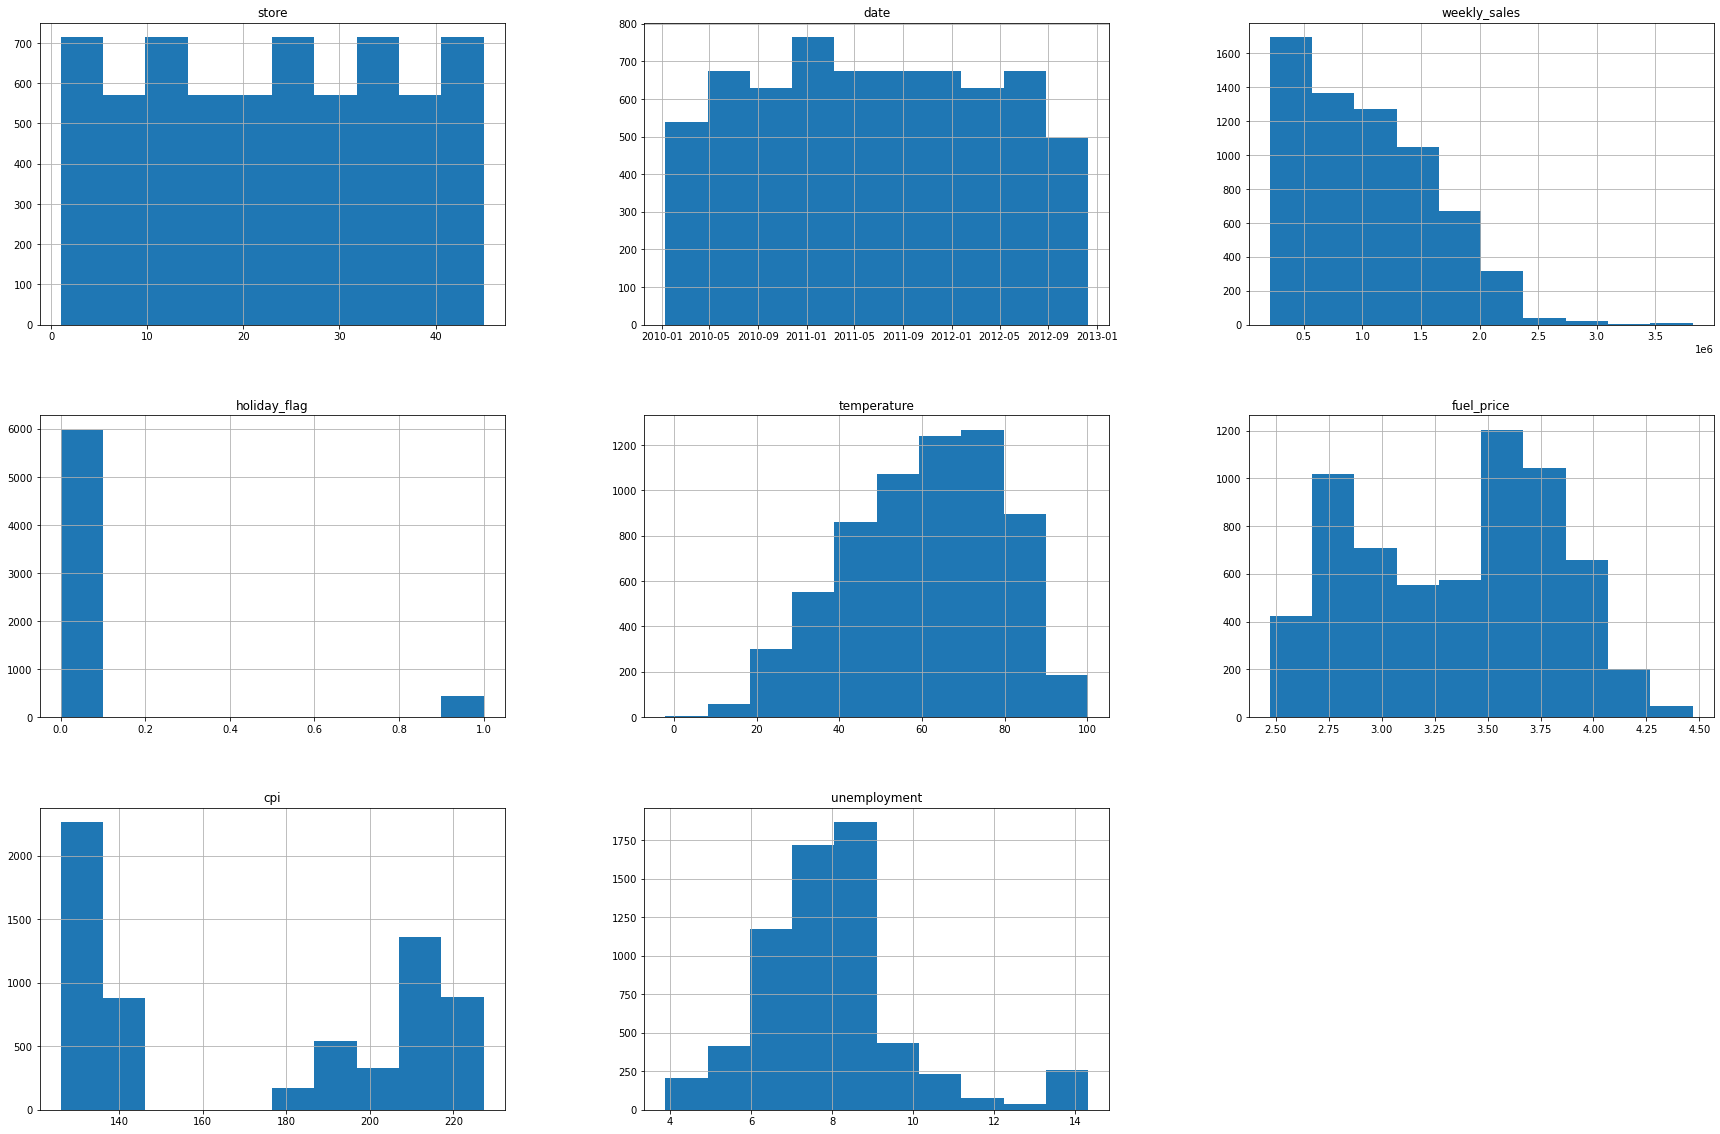

In [14]:
data.hist(figsize=(30,20))

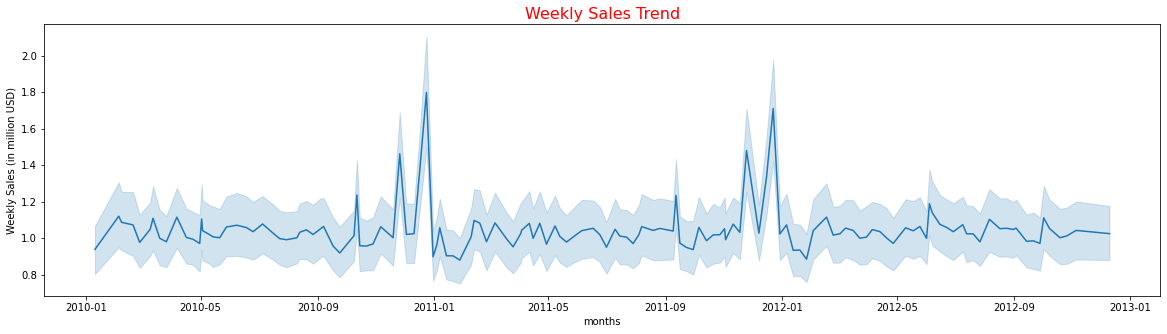

In [15]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x=data.date, y=(data.weekly_sales/1e6))
plt.xlabel('months')
plt.ylabel('Weekly Sales (in million USD)')
plt.title('Weekly Sales Trend',fontdict={'fontsize': 16, 'color':'red'}, pad=5)
annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)
plt.show()

In [16]:
data['employment'] = 100 - data['unemployment']
# split the date column
data['year']= data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.dayofweek
data.head(3)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,employment,year,month,day,day_of_week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,91.894,2010,5,2,6
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,91.894,2010,12,2,3
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,91.894,2010,2,19,4


In [17]:
# create the pivot table
pivot_table = data.pivot_table(index='month', columns='year', values='weekly_sales')
# display the pivot table
pivot_table

year,2010,2011,2012
month,,,
1,9.386639e+05,9.420697e+05,9.567817e+05
2,1.064372e+06,1.042273e+06,1.057997e+06
3,1.034590e+06,1.011263e+06,1.025510e+06
4,1.021177e+06,1.033220e+06,1.014127e+06
5,1.039303e+06,1.015565e+06,1.053948e+06
...,...,...,...
8,1.025212e+06,1.044895e+06,1.064514e+06
9,9.983559e+05,1.026810e+06,9.988663e+05
10,1.027201e+06,1.020663e+06,1.044885e+06


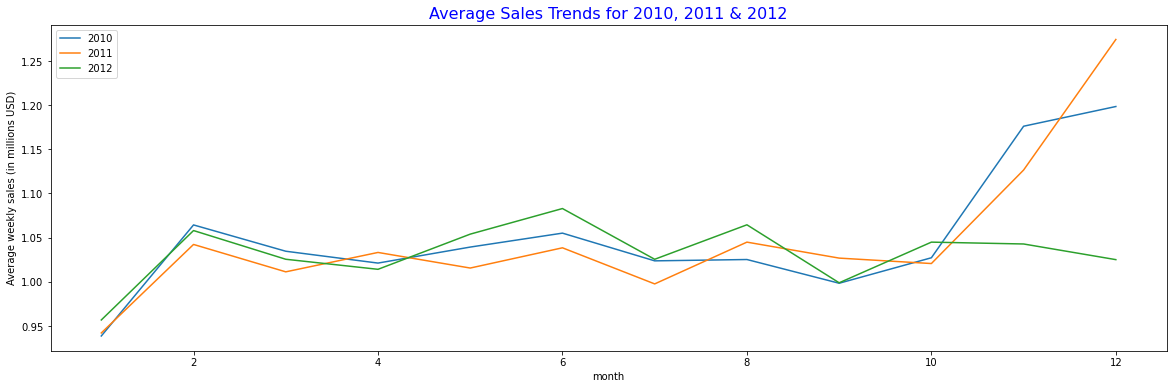

In [18]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.set_palette("bright")
sns.lineplot(x=pivot_table.index, y=pivot_table[2010]/1e6, ax=ax, label='2010')
sns.lineplot( x=pivot_table.index, y=pivot_table[2011]/1e6, ax=ax, label='2011')
sns.lineplot( x=pivot_table.index, y=pivot_table[2012]/1e6, ax=ax, label='2012')
plt.ylabel('Average weekly sales (in millions USD)')
plt.title('Average Sales Trends for 2010, 2011 & 2012', fontdict ={'fontsize':16,
                                                                   'color':'blue',
                                                                  }
         )
# Add a legend
plt.legend()
plt.show()

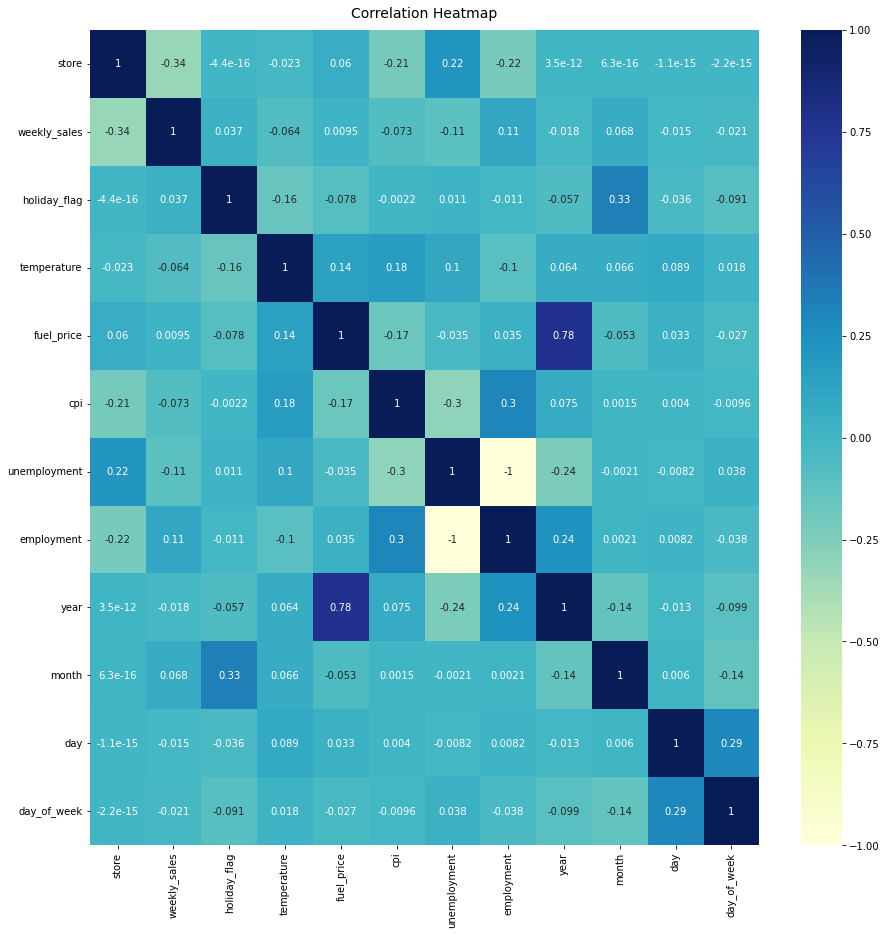

In [19]:
fig, ax = plt.subplots(figsize=(15,15))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap ="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [20]:
test_data = data.copy()
test_data.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,employment,year,month,day,day_of_week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,91.894,2010,5,2,6
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,91.894,2010,12,2,3
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,91.894,2010,2,19,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,91.894,2010,2,26,4
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,91.894,2010,5,3,0


In [21]:
test_data.pop('date')

0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
          ...    
6430   2012-09-28
6431   2012-05-10
6432   2012-12-10
6433   2012-10-19
6434   2012-10-26
Name: date, Length: 6435, dtype: datetime64[ns]

In [52]:
x = test_data.drop('weekly_sales',axis=1)
y = test_data['weekly_sales']

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [54]:
x.head(3)

,store,holiday_flag,temperature,fuel_price,cpi,unemployment,employment,year,month,day,day_of_week
0,1,0,42.31,2.57,211.10,8.11,91.89,2010,5,2,6
1,1,1,38.51,2.55,211.24,8.11,91.89,2010,12,2,3
2,1,0,39.93,2.51,211.29,8.11,91.89,2010,2,19,4


In [ ]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.metrics import mean_squared_error

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # train
    model.fit(X_train, y_train)
    # predict
    y_pred = model.predict(X_test)
    # calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    # calculate RMSE
    rmse = np.sqrt(mse)
    return rmse

In [57]:
def evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test):
    # evaluate the models and compute their RMSE on the test data
    rmses = [evaluate_model(regressor, X_train, y_train, X_test, y_test) for regressor in regressors]
    # create a dictionary mapping the names of the regressors to their RMSE
    regressor_rmses = dict(zip(regressor_names, rmses))
    # convert the dictionary to a pandas dataframe
    df = pd.DataFrame.from_dict(regressor_rmses, orient='index')
    # reset the index of the dataframe
    df = df.reset_index()
    # rename the columns of the dataframe
    df.columns = ['regressor_name', 'rmse']
    # sort the dataframe by RMSE in ascending order
    return df.sort_values('rmse', ignore_index=True)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

linear_regressor = LinearRegression()
logistic_regression = LogisticRegression()
polynomial_features = PolynomialFeatures(degree=2)
polynomial_regressor = Pipeline([("polynomial_features", polynomial_features),
("linear_regression", linear_regressor)])
ridge_regressor = Ridge()
lasso_regressor = Lasso()
elastic_net_regressor = ElasticNet()
decision_tree_regressor = DecisionTreeRegressor()
random_forest_regressor = RandomForestRegressor()
boosted_tree_regressor = GradientBoostingRegressor()
neural_network_regressor = MLPRegressor()
support_vector_regressor = SVR()
grad_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, loss='ls')
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='uniform')
spline_regressor = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [59]:

regressors = [linear_regressor, logistic_regression, polynomial_regressor, ridge_regressor, lasso_regressor, elastic_net_regressor,
decision_tree_regressor, random_forest_regressor, boosted_tree_regressor, neural_network_regressor,
support_vector_regressor, knn_regressor, spline_regressor]

regressor_names = ["Linear Regression","Logistic_Regression", "Polynomial Regression", "Ridge Regression", "Lasso",
"Elastic Net Regression", "Decision Tree Regression", "Random Forest Regressor",
"Boosted Tree Regression", "Neural Network Regression", "Support Vector Regressor",
"K-Nearest Neighbour Regression", "Spline Regression"]

In [60]:
# print('\033[1m Table of regressors and their RMSEs')
# evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test)

In [64]:
# !pip install lazypredict

In [65]:
print(X_test)
print(X_train)
print(y_train)
print(y_test)

[[-0.38499525 -0.27420425 -0.99079799 ...  1.66322793 -1.44522106
   0.29904117]
 [ 0.07699905 -0.27420425  0.4454804  ... -0.14316392  0.95389383
   0.29904117]
 [-1.61698006 -0.27420425  0.28227927 ...  1.06109731  1.41086809
   0.29904117]
 ...
 [ 1.69397911 -0.27420425 -1.80843024 ... -0.44422923 -1.55946462
   1.70110303]
 [-1.61698006 -0.27420425  0.14130819 ... -1.34742516 -1.33097749
  -0.40198976]
 [-0.4619943  -0.27420425 -1.97651114 ... -0.74529454 -1.44522106
   1.70110303]]
[[-1.15498576 -0.27420425  0.79465491 ...  0.760032    0.15418887
   0.29904117]
 [-1.23198481 -0.27420425 -2.16682209 ...  1.36216262 -1.44522106
  -0.40198976]
 [ 1.46298196 -0.27420425  0.03124231 ...  1.66322793 -0.53127253
   1.0000721 ]
 ...
 [ 1.0779867  -0.27420425  1.41221666 ... -0.44422923 -0.87400323
   1.70110303]
 [ 1.15498576  3.64691651 -0.86880379 ...  1.66322793  1.63935523
   0.29904117]
 [-1.23198481 -0.27420425 -1.81005683 ... -1.34742516  0.382676
   0.29904117]]
1033    836707.85


In [68]:
from lazypredict.Supervised import LazyClassifier
reg = LazyClassifier(verbose=0, ignore_warnings=False,custom_metric=None)
models,predictons = reg.fit(X_train,X_test,y_train,y_test)

100%|██████████████████████████████████████████| 29/29 [00:00<00:00, 170.61it/s]

AdaBoostClassifier model failed to execute
Unknown label type: 'continuous'
BaggingClassifier model failed to execute
Unknown label type: 'continuous'
BernoulliNB model failed to execute
Unknown label type: (array([836707.85, 558963.83, 588592.61, ..., 510787.46, 342667.35,
       506760.54]),)
CalibratedClassifierCV model failed to execute
Unknown label type: 'continuous'
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
DecisionTreeClassifier model failed to execute
Unknown label type: 'continuous'
DummyClassifier model failed to execute
continuous is not supported
ExtraTreeClassifier model failed to execute
Unknown label type: 'continuous'
ExtraTreesClassifier model failed to execute
Unknown label type: 'continuous'
GaussianNB model failed to execute
Unknown label type: (array([ 209986.25,  215359.21,  219804.85, ..., 3595903.2 , 3676388.98,
       3749057.69]),)
KNeighborsClassifier model failed to execute
Unknown label type: 'continuou

In [69]:
print(models)

Empty DataFrame
Columns: [Accuracy, Balanced Accuracy, ROC AUC, F1 Score, Time Taken]
Index: []


In [ ]:
import warnings
import itertools

In [ ]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

In [ ]:
data

In [ ]:
week_sales= data.groupby('date')['weekly_sales'].sum()
week_sales

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(week_sales)
plt.xlabel("Years")
plt.ylabel("Weekly_Sales")

In [ ]:
fig,axes = plt.subplots(1,1)
fig.set_figwidth(14)
fig.set_figheight(8)

plt.plot(data.index,data,label='Original')
plt.plot(data.index,data.rolling(window=12).mean(),label='12 Months Rolling Mean')
axes.set_title('12 Months Moving Average')
plt.legend(loc='best')
plt.tight_layout()
plt.show()